In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import io
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
Trump_dataset = pd.read_csv('/content/hashtag_donaldtrump.csv', lineterminator='\n')
Biden_dataset = pd.read_csv('/content/hashtag_joebiden.csv', lineterminator='\n', error_bad_lines=False)


<ipython-input-5-4f9199b7b202>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Biden_dataset = pd.read_csv('/content/hashtag_joebiden.csv', lineterminator='\n', error_bad_lines=False)


In [ ]:
Trump_dataset.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [ ]:
Biden_dataset.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [ ]:
Trump_dataset = Trump_dataset.drop(columns = ['tweet_id','collected_at','user_description','collected_at'])
Biden_dataset = Biden_dataset.drop(columns = ['tweet_id','collected_at','user_description','collected_at'])

In [ ]:
Trump_dataset.loc[:,'condidat'] = 'Trump'
Biden_dataset.loc[:,'condidat'] = 'Biden'

In [ ]:
Data_Mixed = pd.concat([Trump_dataset,Biden_dataset])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,condidat
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,Trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump


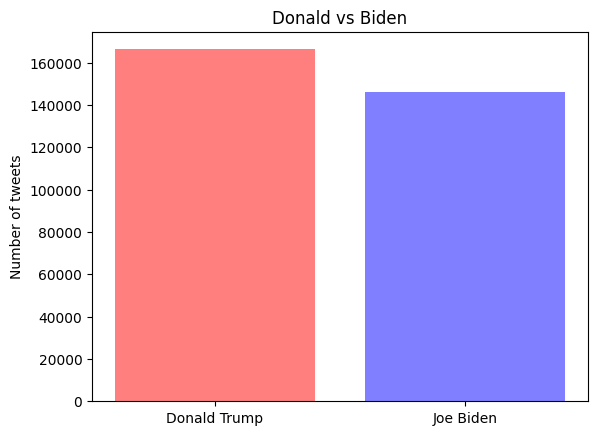

In [ ]:
Trump_tweets = Data_Mixed.query('(condidat == "Trump")').tweet.count()
Biden_tweets = Data_Mixed.query('(condidat == "Biden")').tweet.count()

objects = ('Donald Trump', 'Joe Biden')
y_pos = np.arange(len(objects))
performance = [Trump_tweets, Biden_tweets]

colors = ['red', 'blue']

plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, objects)
plt.ylabel('Number of tweets')
plt.title('Donald vs Biden')

plt.show()

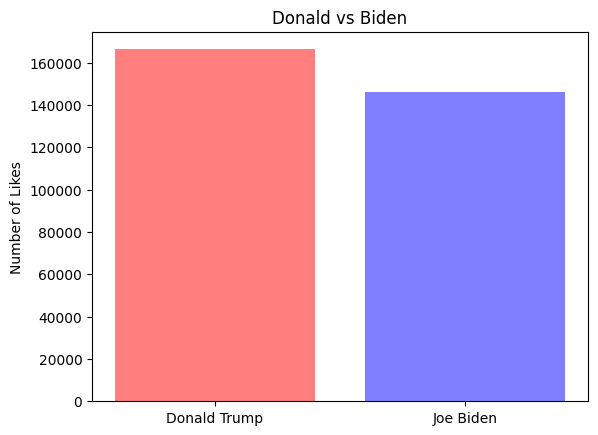

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Trump_likes = Data_Mixed.query('(condidat == "Trump")').likes.count()
Biden_likes = Data_Mixed.query('(condidat == "Biden")').likes.count()

objects = ('Donald Trump', 'Joe Biden')
y_pos = np.arange(len(objects))
performance = [Trump_likes, Biden_likes]

colors = ['red', 'blue']

plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Likes')
plt.title('Donald vs Biden')

plt.show()


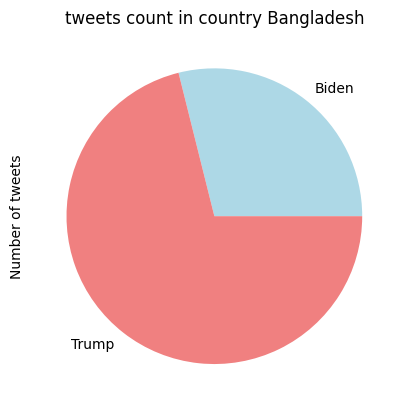

In [ ]:
def Country_tweets(country, kind):
    Data = Data_Mixed[Data_Mixed.country == country].groupby('condidat').tweet.count()
    colors = ['lightblue', 'lightcoral']

    Data.plot(x='condidate', y="tweet", kind=kind, title="tweets count in country " + str(country), colors=colors)
    plt.ylabel('Number of tweets')
    plt.show()

Country_tweets('Bangladesh', 'pie')

In [ ]:
import plotly.graph_objects as go

class Chart_builder:

    def __init__(self, topic_index, number):
        super().__init__()
        self.topic_index = topic_index
        self.topics_list = ['source', 'country', 'state', 'continent', 'city']
        self.number = number
        self.index = self.topics_list[self.topic_index]
        self.Trump_tweets_sources_x = Data_Mixed.query('(condidat == "Trump")').groupby(by=self.index).count().tweet.sort_values(ascending=False)[:self.number].index

        self.Trump_tweets_sources_y = Data_Mixed.query('(condidat == "Trump")').groupby(by=self.index).count().tweet.sort_values(ascending=False)[:self.number]

        self.Biden_tweets_sources_x = Data_Mixed.query('(condidat == "Biden")').groupby(by=self.index).count().tweet.sort_values(ascending=False)[:self.number].index

        self.Biden_tweets_sources_y = Data_Mixed.query('(condidat == "Biden")').groupby(by=self.index).count().tweet.sort_values(ascending=False)[:self.number]

    def Builder(self):

        trump_color = 'rgba(255, 0, 0, 0.7)'
        biden_color = 'rgba(0, 0, 255, 0.7)'

        fig = go.Figure([
            go.Bar(x=self.Trump_tweets_sources_x, y=self.Trump_tweets_sources_y, name='Trump', marker_color=trump_color),
            go.Bar(x=self.Biden_tweets_sources_x, y=self.Biden_tweets_sources_y, name='Biden', marker_color=biden_color)
        ])

        fig.update_layout(
            title_text='Top ' + str(self.number) + ' ' + self.index,
            xaxis_title='Sources',
            yaxis_title='Tweets Count'
        )
        fig.show()


topic_index = 1
number = 5

launch = Chart_builder(topic_index, number)
launch.Builder()


topic_index = 0
number = 10
launch = Chart_builder(topic_index, number)
launch.Builder()

topic_index = 2
number = 10
launch = Chart_builder(topic_index, number)
launch.Builder()

topic_index = 3
number = 10
launch = Chart_builder(topic_index, number)
launch.Builder()

topic_index = 4
number = 10
launch = Chart_builder(topic_index, number)
launch.Builder()


In [ ]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

In [ ]:
def getSubjectivity(text):       #Subjectivity measure
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):            #Polarity score
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
Trump_Tweets = Data_Mixed.query('(condidat == "Trump")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
Trump_Tweets = Trump_Tweets.dropna().loc[Trump_Tweets.country == 'United States of America'][:1000]


Trump_Tweets.reset_index(inplace = True, drop = True)

Trump_Tweets['ClearTweet'] = Trump_Tweets['tweet'].apply(clean)

Trump_Tweets['subjectivity']= Trump_Tweets['ClearTweet'].apply(getSubjectivity)
Trump_Tweets['polarity']    = Trump_Tweets['ClearTweet'].apply(getPolarity)
Trump_Tweets['analysis']    = Trump_Tweets['polarity'].apply(getAnalysis)
Trump_Tweets.head()


Trump_Tweets.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,"President Donald #Trump’s youngest daughter, T...",United States of America,president donald trump s youngest daughter ti...,0.00,0.000000,neutral
1,Watch Live: #DonaldTrump and #JoeBiden face of...,United States of America,watch live donaldtrump and joebiden face off ...,0.75,0.068182,positive
2,Una psicóloga analizó la ropa de #DonaldTrump ...,United States of America,una psicóloga analizó la ropa de donaldtrump y...,0.00,0.000000,neutral
3,"Yes, I know. #ThomTillis was trailing #CalCunn...",United States of America,yes i know thomtillis was trailing calcunnin...,0.50,-0.500000,negative
4,POLL: Trump's Approval Hits 52% https://t.co/0...,United States of America,poll trump s approval hits donaldtrump j...,0.00,0.000000,neutral


In [ ]:
#TextBlob

import plotly.graph_objects as go

general = Trump_Tweets.groupby('analysis').analysis.count()
neutral = Trump_Tweets[Trump_Tweets['analysis'] == 'neutral'].ClearTweet.count()
positive = Trump_Tweets[Trump_Tweets['analysis'] == 'positive'].ClearTweet.count()
negative = Trump_Tweets[Trump_Tweets['analysis'] == 'negative'].ClearTweet.count()

total_tweets = len(Trump_Tweets)
percent_positive = (positive / total_tweets) * 100
percent_negative = (negative / total_tweets) * 100
percent_neutral = (neutral / total_tweets) * 100

fig = go.Figure()

fig.add_trace(go.Bar(
    x=["Positivity"],
    y=[percent_positive],
    name=f'Positivity ({percent_positive:.2f}%)',
    marker_color='blue',
    text=[f'{percent_positive:.2f}%'],
    textposition='auto',
))

fig.add_trace(go.Bar(
    x=["Negativity"],
    y=[percent_negative],
    name=f'Negativity ({percent_negative:.2f}%)',
    marker_color='red',
    text=[f'{percent_negative:.2f}%'],
    textposition='auto',
))

fig.add_trace(go.Bar(
    x=["Neutrality"],
    y=[percent_neutral],
    name=f'Neutrality ({percent_neutral:.2f}%)',
    marker_color='green',
    text=[f'{percent_neutral:.2f}%'],
    textposition='auto',
))

fig.update_layout(
    barmode='stack',
    title_text='Sentiment Analysis of Tweets - Donald Trump (TextBolb)',
)

fig.show()


In [ ]:
Biden_Tweets = Data_Mixed.query('(condidat == "Biden")')

Biden_Tweets['user_followers_count'] = pd.to_numeric(Biden_Tweets['user_followers_count'], errors='coerce')
Biden_Tweets = Biden_Tweets.dropna(subset=['user_followers_count'])

Biden_Tweets = Biden_Tweets.sort_values('user_followers_count', ascending=False).drop_duplicates(['user_name'])

Biden_Tweets = Biden_Tweets.loc[Biden_Tweets['country'] == 'United States of America']

Biden_Tweets = Biden_Tweets.head(1000)

Biden_Tweets.reset_index(inplace=True, drop=True)

Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

Biden_Tweets['subjectivity'] = Biden_Tweets['ClearTweet'].apply(getSubjectivity)
Biden_Tweets['polarity'] = Biden_Tweets['ClearTweet'].apply(getPolarity)
Biden_Tweets['analysis'] = Biden_Tweets['polarity'].apply(getAnalysis)

Biden_Tweets.head()


<ipython-input-19-ca08901bb9c7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,...,city,country,continent,state,state_code,condidat,ClearTweet,subjectivity,polarity,analysis
0,2020-10-23 01:33:10,Final Debate: #Trump and #Biden go after each ...,30.0,6.0,SocialFlow,17446621.0,The Hollywood Reporter,THR,2008-11-17 18:10:33,3262030.0,...,Los Angeles,United States of America,North America,California,CA,Biden,final debate trump and biden go after each ot...,0.687500,-0.062500,negative
1,2020-10-21 15:52:01,🇺🇸#Trump o #Biden: ¿Quién ganará el voto latin...,19.0,5.0,TweetDeck,22952132.0,Telemundo,Telemundo,2009-03-05 18:02:06,2961194.0,...,Miami,United States of America,North America,Florida,FL,Biden,trump o biden quién ganará el voto latino ...,0.000000,0.000000,neutral
2,2020-10-23 15:39:45,"Whatever you do, DON’T BELIEVE THE POLLS. Vot...",22654.0,4277.0,Twitter for iPhone,139823781.0,bettemidler,BetteMidler,2010-05-03 20:00:36,2030307.0,...,New York,United States of America,North America,New York,NY,Biden,whatever you do don t believe the polls vot...,0.288889,-0.155556,negative
3,2020-10-22 14:59:27,POLL: Trump's Approval Hits 52% https://t.co/0...,1967.0,486.0,Twitter for iPhone,25101996.0,Kimberly Guilfoyle,kimguilfoyle,2009-03-18 16:33:40,1865269.0,...,New York,United States of America,North America,New York,NY,Biden,poll trump s approval hits donaldtrump j...,0.000000,0.000000,neutral
4,2020-10-21 04:00:00,"""Burisma Executive Emailed Hunter #Biden about...",1008.0,424.0,Twitter Media Studio,18247062.0,Judicial Watch ⚖️,JudicialWatch,2008-12-19 18:04:57,1827801.0,...,Washington,United States of America,North America,District of Columbia,DC,Biden,burisma executive emailed hunter biden about ...,0.500000,0.500000,positive


In [ ]:
import plotly.graph_objects as go

general = Biden_Tweets.groupby('analysis').analysis.count()
neutral = Biden_Tweets[Biden_Tweets['analysis'] == 'neutral'].ClearTweet.count()
positive = Biden_Tweets[Biden_Tweets['analysis'] == 'positive'].ClearTweet.count()
negative = Biden_Tweets[Biden_Tweets['analysis'] == 'negative'].ClearTweet.count()

total_tweets = len(Biden_Tweets)
percent_positive = (positive / total_tweets) * 100
percent_negative = (negative / total_tweets) * 100
percent_neutral = (neutral / total_tweets) * 100

fig = go.Figure()

fig.add_trace(go.Bar(
    x=["Positivity"],
    y=[percent_positive],
    name=f'Positivity ({percent_positive:.2f}%)',
    marker_color='blue',
    text=[f'{percent_positive:.2f}%'],
    textposition='auto',
))

fig.add_trace(go.Bar(
    x=["Negativity"],
    y=[percent_negative],
    name=f'Negativity ({percent_negative:.2f}%)',
    marker_color='red',
    text=[f'{percent_negative:.2f}%'],
    textposition='auto',
))

fig.add_trace(go.Bar(
    x=["Neutrality"],
    y=[percent_neutral],
    name=f'Neutrality ({percent_neutral:.2f}%)',
    marker_color='green',
    text=[f'{percent_neutral:.2f}%'],
    textposition='auto',
))

fig.update_layout(
    barmode='stack',
    title_text='Sentiment Analysis of Tweets - Joe Biden (TextBlob)',
)

fig.show()


In [ ]:
#BERT
!pip install transformers
!pip install torch


In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")

def getAnalysisBERT(text):
    result = sentiment_analyzer(text)
    label = result[0]['label']

    if label == 'NEGATIVE':
        return 'negative'
    elif label == 'POSITIVE':
        return 'positive'
    else:
        return 'neutral'

Trump_Tweets['analysis_bert'] = Trump_Tweets['ClearTweet'].apply(getAnalysisBERT)

print(Trump_Tweets[['ClearTweet', 'analysis_bert']].head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

                                          ClearTweet analysis_bert
0  president donald trump s youngest daughter  ti...      positive
1  watch live  donaldtrump and joebiden face off ...      positive
2  una psicóloga analizó la ropa de donaldtrump y...      negative
3  yes  i know  thomtillis was trailing calcunnin...      negative
4  poll  trump s approval hits      donaldtrump j...      positive


In [ ]:
import plotly.graph_objects as go

neutral_bert = Trump_Tweets[Trump_Tweets['analysis_bert'] == 'neutral'].ClearTweet.count()
positive_bert = Trump_Tweets[Trump_Tweets['analysis_bert'] == 'positive'].ClearTweet.count()
negative_bert = Trump_Tweets[Trump_Tweets['analysis_bert'] == 'negative'].ClearTweet.count()

total_tweets_bert = len(Trump_Tweets)
percent_positive_bert = (positive_bert / total_tweets_bert) * 100
percent_negative_bert = (negative_bert / total_tweets_bert) * 100
percent_neutral_bert = (neutral_bert / total_tweets_bert) * 100

fig_bert = go.Figure()

fig_bert.add_trace(go.Bar(
    x=["Positivity"],
    y=[percent_positive_bert],
    name=f'Positivity ({percent_positive_bert:.2f}%)',
    marker_color='blue',
    text=[f'{percent_positive_bert:.2f}%'],
    textposition='auto',
))

fig_bert.add_trace(go.Bar(
    x=["Negativity"],
    y=[percent_negative_bert],
    name=f'Negativity ({percent_negative_bert:.2f}%)',
    marker_color='red',
    text=[f'{percent_negative_bert:.2f}%'],
    textposition='auto',
))

fig_bert.add_trace(go.Bar(
    x=["Neutrality"],
    y=[percent_neutral_bert],
    name=f'Neutrality ({percent_neutral_bert:.2f}%)',
    marker_color='green',
    text=[f'{percent_neutral_bert:.2f}%'],
    textposition='auto',
))

fig_bert.update_layout(
    barmode='stack',
    title_text='Sentiment Analysis of Tweets for Trumps (BERT)',
    xaxis_title='Sentiment',
    yaxis_title='Percentage of Tweets',
)

fig_bert.show()


In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import Counter

sentiment_analyzer = pipeline("sentiment-analysis")

def getAnalysisBERT(text):
    result = sentiment_analyzer(text)
    label = result[0]['label']

    if label == 'NEGATIVE':
        return 'negative'
    elif label == 'POSITIVE':
        return 'positive'
    else:
        return 'neutral'

Biden_Tweets['analysis_bert'] = Biden_Tweets['ClearTweet'].apply(getAnalysisBERT)

print(Biden_Tweets[['ClearTweet', 'analysis_bert']].head())

total_tweets_bert = len(Biden_Tweets)
target_cnt_bert = Counter(Biden_Tweets['analysis_bert'])
percent_positive_bert = (target_cnt_bert['positive'] / total_tweets_bert) * 100
percent_negative_bert = (target_cnt_bert['negative'] / total_tweets_bert) * 100
percent_neutral_bert = (target_cnt_bert['neutral'] / total_tweets_bert) * 100

fig_bert = go.Figure()

fig_bert.add_trace(go.Bar(
    x=["Positivity"],
    y=[percent_positive_bert],
    name=f'Positivity ({percent_positive_bert:.2f}%)',
    marker_color='blue',
    text=[f'{percent_positive_bert:.2f}%'],
    textposition='auto',
))

fig_bert.add_trace(go.Bar(
    x=["Negativity"],
    y=[percent_negative_bert],
    name=f'Negativity ({percent_negative_bert:.2f}%)',
    marker_color='red',
    text=[f'{percent_negative_bert:.2f}%'],
    textposition='auto',
))

fig_bert.add_trace(go.Bar(
    x=["Neutrality"],
    y=[percent_neutral_bert],
    name=f'Neutrality ({percent_neutral_bert:.2f}%)',
    marker_color='green',
    text=[f'{percent_neutral_bert:.2f}%'],
    textposition='auto',
))

fig_bert.update_layout(
    barmode='stack',
    title_text='Sentiment Analysis of Tweets (Joe Biden - BERT)',
    xaxis_title='Sentiment',
    yaxis_title='Percentage of Tweets',
)

fig_bert.show()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                          ClearTweet analysis_bert
0  final debate  trump and biden go after each ot...      positive
1    trump o biden   quién ganará el voto latino ...      negative
2  whatever you do  don t believe the polls   vot...      negative
3  poll  trump s approval hits      donaldtrump j...      positive
4   burisma executive emailed hunter biden about ...      negative


In [ ]:
#VADER

!pip install nltk


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objects as go
from collections import Counter

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def getAnalysisVADER(text):

    compound_score = sid.polarity_scores(text)['compound']

    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

Trump_Tweets['analysis_vader'] = Trump_Tweets['ClearTweet'].apply(getAnalysisVADER)

print(Trump_Tweets[['ClearTweet', 'analysis_vader']].head())

total_tweets_vader = len(Trump_Tweets)
target_cnt_vader = Counter(Trump_Tweets['analysis_vader'])
percent_positive_vader = (target_cnt_vader['positive'] / total_tweets_vader) * 100
percent_negative_vader = (target_cnt_vader['negative'] / total_tweets_vader) * 100
percent_neutral_vader = (target_cnt_vader['neutral'] / total_tweets_vader) * 100

fig_vader = go.Figure()

fig_vader.add_trace(go.Bar(
    x=["Positivity"],
    y=[percent_positive_vader],
    name=f'Positivity ({percent_positive_vader:.2f}%)',
    marker_color='blue',
    text=[f'{percent_positive_vader:.2f}%'],
    textposition='auto',
))

fig_vader.add_trace(go.Bar(
    x=["Negativity"],
    y=[percent_negative_vader],
    name=f'Negativity ({percent_negative_vader:.2f}%)',
    marker_color='red',
    text=[f'{percent_negative_vader:.2f}%'],
    textposition='auto',
))

fig_vader.add_trace(go.Bar(
    x=["Neutrality"],
    y=[percent_neutral_vader],
    name=f'Neutrality ({percent_neutral_vader:.2f}%)',
    marker_color='green',
    text=[f'{percent_neutral_vader:.2f}%'],
    textposition='auto',
))

fig_vader.update_layout(
    barmode='stack',
    title_text='Sentiment Analysis of Tweets for Trump(VADER)',
    xaxis_title='Sentiment',
    yaxis_title='Percentage of Tweets',
)

fig_vader.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                          ClearTweet analysis_vader
0  president donald trump s youngest daughter  ti...       positive
1  watch live  donaldtrump and joebiden face off ...        neutral
2  una psicóloga analizó la ropa de donaldtrump y...       positive
3  yes  i know  thomtillis was trailing calcunnin...       negative
4  poll  trump s approval hits      donaldtrump j...       positive


In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
import plotly.graph_objects as go
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Biden_Tweets = Data_Mixed.query('(condidat == "Biden")')

Biden_Tweets['user_followers_count'] = pd.to_numeric(Biden_Tweets['user_followers_count'], errors='coerce')
Biden_Tweets = Biden_Tweets.dropna(subset=['user_followers_count'])

Biden_Tweets = Biden_Tweets.sort_values('user_followers_count', ascending=False).drop_duplicates(['user_name'])

Biden_Tweets = Biden_Tweets.loc[Biden_Tweets['country'] == 'United States of America']

Biden_Tweets = Biden_Tweets.head(1000)

Biden_Tweets.reset_index(inplace=True, drop=True)

Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

analyzer = SentimentIntensityAnalyzer()

Biden_Tweets['compound'] = Biden_Tweets['ClearTweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
Biden_Tweets['analysis'] = Biden_Tweets['compound'].apply(getAnalysis)

Biden_Tweets.head()

total_tweets_vader = len(Biden_Tweets)
target_cnt_vader = Counter(Biden_Tweets['analysis'])
percent_positive_vader = (target_cnt_vader['positive'] / total_tweets_vader) * 100
percent_negative_vader = (target_cnt_vader['negative'] / total_tweets_vader) * 100
percent_neutral_vader = (target_cnt_vader['neutral'] / total_tweets_vader) * 100

fig_vader = go.Figure()

fig_vader.add_trace(go.Bar(
    x=["Positivity"],
    y=[percent_positive_vader],
    name=f'Positivity ({percent_positive_vader:.2f}%)',
    marker_color='blue',
    text=[f'{percent_positive_vader:.2f}%'],
    textposition='auto',
))

fig_vader.add_trace(go.Bar(
    x=["Negativity"],
    y=[percent_negative_vader],
    name=f'Negativity ({percent_negative_vader:.2f}%)',
    marker_color='red',
    text=[f'{percent_negative_vader:.2f}%'],
    textposition='auto',
))

fig_vader.add_trace(go.Bar(
    x=["Neutrality"],
    y=[percent_neutral_vader],
    name=f'Neutrality ({percent_neutral_vader:.2f}%)',
    marker_color='green',
    text=[f'{percent_neutral_vader:.2f}%'],
    textposition='auto',
))

fig_vader.update_layout(
    barmode='stack',
    title_text='Sentiment Analysis of Tweets Joe Biden (VADER)',
    xaxis_title='Sentiment',
    yaxis_title='Percentage of Tweets',
)

# Show the plot
fig_vader.show()


<ipython-input-28-d3ca1b1b3b2a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

